### Name: Dillon Pullano

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [ ]:
# Import initial modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [ ]:
# NOTE: 'seeds_dataset.txt' will need to be dragged into the local runtime before running this cell

# Assign headers from original dataset website:
df_headers = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove_Length', 'Type']

# Import dataset:
df = pd.read_csv('seeds_dataset.txt', sep = '\t', header = None, names = df_headers)

# Inspect the first 5 rows:
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove_Length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [ ]:
# Separate the data into feature matrix and target vector:
X = df.drop('Type', axis = 1)   # Feature Matrix
y = df.loc[:,'Type']            # Target Vector

# Print the shape of X and y:
print("The shape of the feature matrix is: " + str(X.shape))
print("The shape of the target vector is: " + str(y.shape))


The shape of the feature matrix is: (210, 7)
The shape of the target vector is: (210,)


### Step 2: Preprocessing (2 marks)

In [ ]:
# Show statistics for feature matrix: (used to answer next question)
X.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove_Length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

ANSWER:

I plan to use the StandardScalar approach to scale the data. Since the measured features are reflecting discrepencies in nature (i.e. variations in seeds), I am assuming that the features follow a normal distribution. Looking at the cell above, most features do not have a high standard deviation and the means are close to the median 50%. For these reasons, StandardScalar in appropriate.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [ ]:
# Import necessary sklearn module:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)

In [ ]:
# Print the shape of the training feature matrix and target vector:
print("The shape of the training feature matrix is: " + str(X_train.shape))
print("The shape of the training target vector is: " + str(y_train.shape))

The shape of the training feature matrix is: (157, 7)
The shape of the training target vector is: (157,)


Now that we have our training data, we can implement our selected scaler.

In [ ]:
# Import necessary sklearn module:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler instance:
standard_scaler = StandardScaler()

# Scale the feature matrices for training and testing datasets:
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.fit_transform(X_val)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [ ]:
# Pipeline approach will be used here:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Instantiate model using Pipeline:
log_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression())
])

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
# Define parameter grid for running GridSearchCV:
log_param_grid = {'regressor__C': [0.01, 0.1, 1.0, 10.0],
             'regressor__fit_intercept': [True, False]}

In [ ]:
# Import necessary sklearn module:
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV instance using logistic regression pipeline with StandardScaler and parameter grid:
log_grid_result = GridSearchCV(log_pipeline, log_param_grid, cv = 5)

# Implement the grid search:
log_grid_result.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LogisticRegression())]),
             param_grid={'regressor__C': [0.01, 0.1, 1.0, 10.0],
                         'regressor__fit_intercept': [True, False]})

In [ ]:
# Print the estimator with the best parameters:
print("The logistic regression estimator with the best parameters is:\n")
print(log_grid_result.best_estimator_)


The logistic regression estimator with the best parameters is:

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression(C=10.0))])


In [ ]:
# Print the best cross-validation score:
print("The best cross-validation score using logistic regression is:\n")
print(log_grid_result.best_score_)


The best cross-validation score using logistic regression is:

0.9368951612903226


In [ ]:
# Grab the best estimator model:
log_best_est = log_grid_result.best_estimator_

# Run testing data through best estimator to get the best test score:
log_best_test = log_best_est.score(X_val, y_val)

# Print the best test score:
print("The best test score using logistic regression is:\n")
print(log_best_test)

The best test score using logistic regression is:

0.9433962264150944


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [ ]:
# Predict y labels using best estimator:
y_pred = log_best_est.predict(X_val)


In [ ]:
# Import necessary sklearn module:
from sklearn.decomposition import PCA

# Instantiate the PCA model:
pca = PCA()

# Reduce dimensions of test data for plotting:
pca_result = pca.fit_transform(X_val)


In [ ]:
# Define feature names in feature matrix:
feature_names = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove_Length']

# Create a PCA dataframe with principle components:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])

# Add the target column into the PCA dataframe:
pca_df['Type'] = y_pred


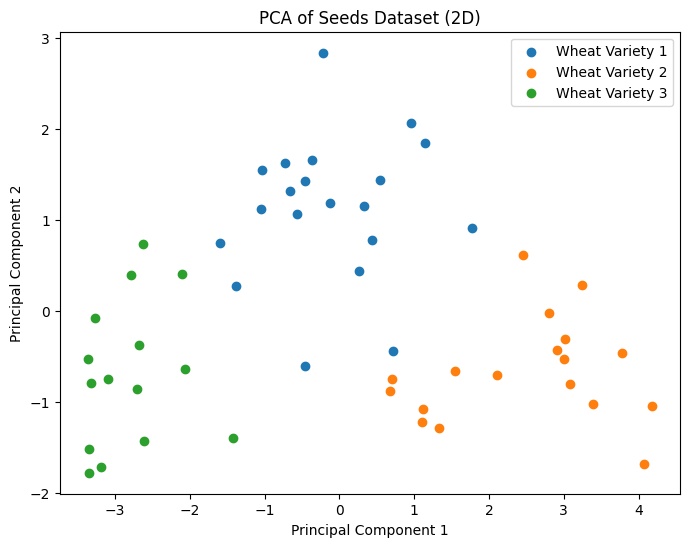

In [ ]:
# Plot test points colored by predicted label:

# Create a 2D scatter plot:
plt.figure(figsize=(8, 6))

# Visualize the first 2 principle components:
for Type in range(1,4):
    plt.scatter(
        pca_df.loc[pca_df['Type'] == Type, 'PC1'],
        pca_df.loc[pca_df['Type'] == Type, 'PC2'],
        label=f'Wheat Variety {Type}'
    )

# Set title and axis labels:
plt.title('PCA of Seeds Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Turn on legend and show plot:
plt.legend()
plt.show()


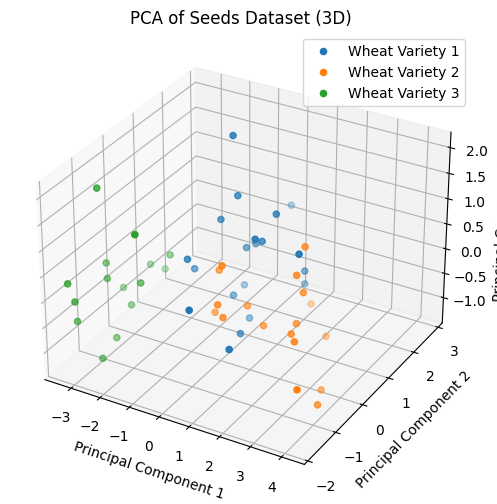

In [ ]:
## PLEASE NOTE: This 3D scatter plot cell was implemented out of curiosity: (please don't grade)

# Import necessary sklearn modules:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualize the first three principal components:
for Type in range(1, 4):
  data_type = pca_df[y_pred == Type]
  ax.scatter(data_type['PC1'], data_type['PC2'], data_type['PC3'],label=f'Wheat Variety {Type}')

# Set title and axis labels:
ax.set_title('PCA of Seeds Dataset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Turn on legend and show plot:
ax.legend()
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

#### Answers

1. The logistic regression model worked well for this dataset. The best model (C = 10 with standard scaling) produced a cross validation score of 0.937, which was calculated using 5 folds in the data. This is a good indication that StandardScaler was a good choice for preprocessing the data and that the model works well on the dataset.

2. PCA worked well for this dataset. When using the results from section 4 to color code the PCA data points with the PCA results in a 2D scatter plot, it can be seen that there is a clear distinction between the 3 wheat variety groupings. The boundaries are distinct enough using only the first 2 principle components that they appear as though they could be separated with a straight line for each boundary.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

###Process Description Answers:
1. All code was written by me. Code was sourced by looking at work that was completed during lab sessions and the answer keys for those sessions that are posted on D2L. Official Sklearn documentation was used in conjunction with ChatGPT to clarify how to use functions that were unknown to me.

2. The steps were completed as follows:

    - Add dataset as a local instance by dragging into drive. Load in dataset / explore
    - Separate dataset into feature matrix and target vector
    - Create training / validation datasets
    - Create pipeline with chosen scaler & parameter grid (assuming it wasn't provided)
    - Run through grid search and find the best model / results
    - Use the best results as the classifications for PCA
    - Run PCA on parameters and plot results

3. Initially I found it challenging to link the results from section 4 into the PCA component for section 5. I was trying to use the 'y_test' dataframe to map to the PCA dataframe and I couldn't figure out why there were NULL values where I was expecting some classification types to be. I realized that I was supposed to use 'y_pred', and that the reason 'y_test' did not work was due to an index mismatch.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [ ]:
# Create StandardScaler instance:
standard_scaler = StandardScaler()

# Scale the feature matrices for training and testing datasets:
X_train = standard_scaler.fit_transform(X_train)
X_val = standard_scaler.fit_transform(X_val)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

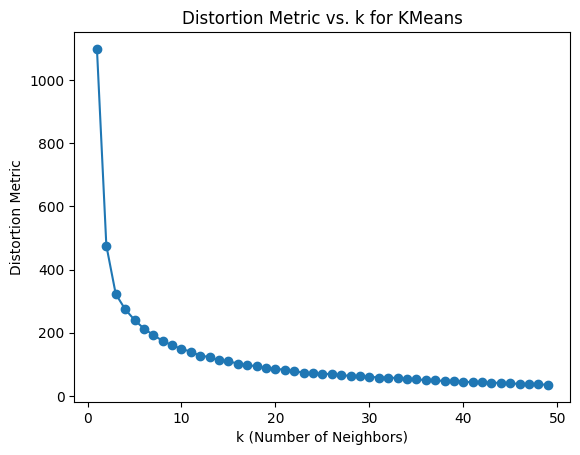

In [ ]:
# Use the elbow method to determine the optimal number of clusters:

# Import necessary sklearn modules:
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

# Suppress depreciation warning for KMeans:
warnings.filterwarnings('ignore', message = 'The default value of `n_init`')

# Define the range of k values to try:
k_values = list(range(1,50))

# Create a list to store the distortion metrics for each k value:
distortion_metrics = []

# Perform k-fold cross-validation for each k in k_values:
for k in k_values:

  # Instantiate the current model:
  curr_kmeans = KMeans(n_clusters = k, random_state = 0)

  # Fit the current model to the training dataset:
  curr_kmeans.fit(X_train)

  # Add distortion metric for current model to list:
  distortion_metrics.append(curr_kmeans.inertia_)

# Plot the distortion values for different k values:
plt.plot(k_values, distortion_metrics, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Distortion Metric')
plt.title('Distortion Metric vs. k for KMeans')
plt.show()


## Elbow Identification:

It can be seen that the rate of distortion decrease falls off significantly after k = 3.

This point has been identified as the elbow and therefore k = 3 will be used moving forward.

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [ ]:
# Assign optimal k based on interpretation of above graph:
k_optimal = 3

# Instantiate model to be used:
final_model = KMeans(n_clusters = k_optimal)

# Fit model using training datasets:
final_model.fit(X_train, y_train)

# Implement K-means on testing data with the number of clusters determined in the previous step:
y_predicted = final_model.predict(X_val)

In [ ]:
# Import necessary sklearn module:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette score:
sil = silhouette_score(X_val, y_predicted)

# Print the Silhouette score to the console:
print("The Silhouette validation metric is: " + str(sil))


The Silhouette validation metric is: 0.4043425234100302


In [ ]:
# Import necessary sklearn module:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz score:
cal = calinski_harabasz_score(X_val, y_predicted)

# Print the Calinski-Harabasz score to the console:
print("The Calinski-Harabasz validation metric is: " + str(cal))


The Calinski-Harabasz validation metric is: 64.14813666384649


In [ ]:
# Import necessary sklearn module:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin score:
dav = davies_bouldin_score(X_val, y_predicted)

# Print the Davies-Bouldin score to the console:
print("The Davies-Bouldin validation metric is: " + str(dav))


The Davies-Bouldin validation metric is: 0.8733253088980723


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

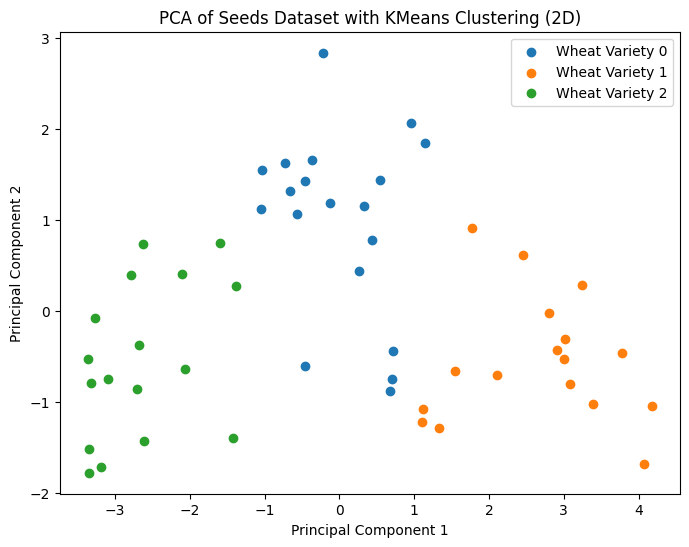

In [ ]:
# Instantiate the PCA model:
pca2 = PCA()

# Reduce dimensions of test data for plotting:
pca_result2 = pca2.fit_transform(X_val)

# Define feature names in feature matrix:
feature_names = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove_Length']

# Create a PCA dataframe with principle components:
pca_df2 = pd.DataFrame(data=pca_result2, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])

# Add the target column into the PCA dataframe:
pca_df2['Type'] = y_predicted

# Create a 2D scatter plot:
plt.figure(figsize=(8, 6))

# Visualize the first 2 principle components:
for Type in range(0,3):
    plt.scatter(
        pca_df2.loc[pca_df2['Type'] == Type, 'PC1'],
        pca_df2.loc[pca_df2['Type'] == Type, 'PC2'],
        label=f'Wheat Variety {Type}'
    )

# Set title and axis labels:
plt.title('PCA of Seeds Dataset with KMeans Clustering (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Turn on legend and show plot:
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [ ]:
# Find the number of principal components using explained variance ratio:

# Grab the explained variancee ratios for the PCA model:
explained_variances = pca2.explained_variance_ratio_

# Calculate the cumulative sum of all variance ratios:
sum_variances = np.cumsum(explained_variances)

# Assign the target for desired variance:
variance_target = 0.95

# Find the index where the total is higher than 0.95 and add 1 to find the # of components:
num_components = np.argmax(sum_variances >= variance_target) + 1

# Print the number of components that are required to explain 95% of the variance to the console:
print("The number of components that can explain 95% of the variance in the data is: " + str(num_components))

The number of components that can explain 95% of the variance in the data is: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# Instantiate the PCA model using the number of components found in the step above:
pca3 = PCA(n_components = num_components)

# Use PCA to transform the datasets into 3-PCA format:
transformed_train_data = pca3.fit_transform(X_train)
transformed_val_data = pca3.fit_transform(X_val)


In [ ]:
# Implement K-means with the transformed data: (assuming that 3 is still the optimal number of clusters)
k_optimal = 3

# Instantiate model to be used:
transformed_model = KMeans(n_clusters = k_optimal)

# Fit model using the transformed training dataset:
transformed_model.fit(transformed_train_data, y_train)

# Implement K-means on testing data using model trained on transformed data:
transformed_y_predicted = transformed_model.predict(transformed_val_data)


In [ ]:
# Calculate the three different validation metrics:
trans_sil = silhouette_score(transformed_val_data, transformed_y_predicted)
trans_cal = calinski_harabasz_score(transformed_val_data, transformed_y_predicted)
trans_dav = davies_bouldin_score(transformed_val_data, transformed_y_predicted)

# Print the three different validation metrics to the console:
print("The Silhouette validation metric is: " + str(trans_sil))
print("The Calinski-Harabasz validation metric is: " + str(trans_cal))
print("The Davies-Bouldin validation metric is: " + str(trans_dav))

The Silhouette validation metric is: 0.2617193002716969
The Calinski-Harabasz validation metric is: 37.78964212763718
The Davies-Bouldin validation metric is: 1.2313720980394782


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results

# Create data for validation metrics from both solutions:
table_data = [
    [sil, cal, dav],
    [trans_sil, trans_cal, trans_dav]
]

# Create headers and index labels:
header_df = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
index_df = ['KMeans Elbow', 'PCA + KMeans']

# Create the dataframe for the table:
display_df = pd.DataFrame(table_data, columns = header_df, index = index_df)

# Print the table to the console:
print(display_df)

              Silhouette  Calinski-Harabasz  Davies-Bouldin
KMeans Elbow    0.404343          64.148137        0.873325
PCA + KMeans    0.261719          37.789642        1.231372


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


#### Answers:

1. The optimal number of clusters being 3 makes sense given the context that we already know the dataset was curated using 3 different types of wheat (Kama, Rosa, and Canadian).

2. When comparing the PCA plot from Part 2 step 1 to the PCA plot from Part 1, we can see that the results are very similar. There were only minor differences between the 2 scatter plots and only 2 - 3 changes in classifications along the boundary between clusters.

3. I used 3 components for my PCA analysis. This is due to the fact that 95% of all variance was explained using the most important 3 principle components. Using PCA before applying KMeans clustering (second approach) did not improve results across all evaluation metrics. The second approach produced lower Silhouette and Calinski-Harabasz metrics and a higher Davies-Bouldin metric. One reason for this could be that the initial 7 dimensions had variance in it that couldn't be captured by the first 3 principle components.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

###Process Description Answers:
1. All code was written by me. Code was sourced by looking at work that was completed during lab sessions and the answer keys for those sessions that are posted on D2L. Official Sklearn documentation was used in conjunction with ChatGPT to clarify how to use functions that were unknown to me. I also referenced the implementation from the first half of this lab.

2. The steps were completed as follows:

    - Scale training and testing datasets appropriately
    - Use elbow method (with distortion metric) to determine optimal number of clusters
    - Implement KMeans of scaled training data and calculate 3 validation metrics
    - Plot KMeans classification results using first 2 PCA components
    - Find optimal number of principal components using explained variance ratio
    - Transform training and testing data into 3 (optimal) PCA components
    - Implement KMeans of 3-PCA transformed data and calculate 3 validation metrics
    - Create table comparing validation metrics from both approaches

3. I found it a little confusing in the way some of the tasks were described in the last section here. For this reason I was asking Chat if the logic to my code made sense when I was unsure of if I was meeting an assigned task requirement.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


## Reflection:

I liked the concept of using PCA to transform a dataset into a kind of compressed set of attributes before training a model. In this scenario it did not turn out to benefit the model but I can see it being beneficial for other models where there may be more attributes that are not as relevant to solving the problem at hand. I found that using the concept of pipelines from the previous assignment was helpful in the first half of this assignment when trying to figure out what parameters to use for the initial logistic regression model.